# EDA Basic Lesson Plan

Welcome to the Exploratory Data Analysis (EDA) lesson! This notebook is designed to guide you through the essential steps of taking a raw dataset, understanding its structure, cleaning it, and transforming it for analysis.

**Structure:**
* **Section 1: The First Look:** How to read files and get a quick statistical summary.
* **Section 2: The Cleanup:** Handling the messy reality of data (missing values, duplicates, outliers).
* **Section 3: Refinement & Transformation:** preparing data for machine learning or deep analysis (mapping, string manipulation).

**For Instructors:** Use the narrative to introduce concepts before running code cells.
**For Learners:** Read the comments in the code to understand exactly what each parameter does.

### Setup
As always, we start by importing the necessary libraries. `pandas` is our primary tool for data manipulation, and `numpy` helps with numerical operations.

In [1]:
import pandas as pd
import numpy as np

---

# Section 1: The First Look: Inspection & Summary

**Goal:** Load data from different file formats and get a "health check" of the data using descriptive statistics.

We will cover:
1. Reading CSV and Text files (handling headers, delimiters, and special characters).
2. Summarizing data using `.describe()`, `.sum()`, and `.value_counts()`.

## Part 1: Reading Data

Pandas is incredibly flexible with input formats. Let's start by reading a standard Comma-Separated Values (CSV) file.

In [ ]:
# Let's inspect the raw file content first using a shell command
!cat ../data/ex1.csv

In [ ]:
# Use read_csv to load the data into a DataFrame
# By default, it assumes the first row is the header
df = pd.read_csv("../data/ex1.csv")

df

**Scenario:** What if the file doesn't have a header row? If we don't specify this, pandas will mistakenly use the first row of data as column names.

In [ ]:
!cat ../data/ex2.csv

In [ ]:
# Option 1: Tell pandas there is no header. It will assign integers (0, 1, 2...) as column names.
pd.read_csv("../data/ex2.csv", header=None)

In [ ]:
# Option 2: Provide your own column names using the 'names' parameter
pd.read_csv("../data/ex2.csv", names=["a", "b", "c", "d", "message"])

**Indexing:** You can also designate a specific column to be the index (row labels) of the DataFrame, rather than the default 0, 1, 2... index.

In [ ]:
names = ["a", "b", "c", "d", "message"]

# Use 'index_col' to set the 'message' column as the index
pd.read_csv("../data/ex2.csv", names=names, index_col="message")

**Irregular Separators:** Sometimes data isn't separated by commas. It might be tabs, spaces, or a variable amount of whitespace. We can use Regular Expressions (Regex) to handle this.

In [ ]:
# Inspect a file with messy whitespace
!cat ../data/ex3.txt

In [ ]:
# sep="\s+" is a regex that means "one or more whitespace characters"
result = pd.read_csv("../data/ex3.txt", sep="\s+")

result

**Skipping Rows:** Sometimes files contain comments or metadata at the top that we want to ignore.

In [ ]:
!cat ../data/ex4.csv

In [ ]:
# Skip specific rows by index (0, 2, and 3 here) to get to the clean data
pd.read_csv("../data/ex4.csv", skiprows=[0, 2, 3])

**Handling Missing Values (at load time):** Pandas is smart about identifying missing data (empty strings, 'NA', 'NULL'), but we can also define our own "sentinels" for missing values.

In [ ]:
!cat ../data/ex5.csv

In [ ]:
# Default behavior: reads 'NA' and 'NULL' as NaN (Not a Number/Missing)
result = pd.read_csv("../data/ex5.csv")

result

In [ ]:
# Verify where the missing values are detected
result.isna()

You can customize what is considered "Missing" for each column specifically.

In [ ]:
# Define a dictionary of sentinels
# For column 'message', treat 'foo' and 'NA' as null
# For column 'something', treat 'two' as null
sentinels = {"message": ["NULL", "NA"], "something": ["two"]}

pd.read_csv("../data/ex5.csv", na_values=sentinels, keep_default_na=False)

**Reading Excel:** Reading Excel files works similarly, but we can specify sheet names.

In [ ]:
# Load the Excel file object
xlsx = pd.ExcelFile("../data/Resaleflatpricesbasedonregistrationdate.xlsx")

# List available sheets
xlsx.sheet_names

In [ ]:
# Parse a specific sheet into a DataFrame
xlsx.parse(sheet_name="2017")

In [ ]:
# Shortcut: Read directly without creating an ExcelFile object first
frame = pd.read_excel("../data/Resaleflatpricesbasedonregistrationdate.xlsx", sheet_name="2017")

frame

## Part 2: Summarizing and Computing Descriptive Statistics

Once data is loaded, we need to understand its "shape". We use summary statistics to get a birds-eye view.

> **📊 Visual Illustration Available**: See ![descriptive_statistics](../visualisations/01_descriptive_statistics.png) for visual representations of descriptive statistics including histograms, box plots, and how statistics like mean, median, and quartiles relate to data distributions.


Let's create a sample DataFrame with some missing values to test our summary methods.

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"], columns=["one", "two"])

df

**Reductions:** Methods like `.sum()` or `.mean()` reduce a Series of numbers to a single value. By default, they operate down the rows (`axis=0`).

In [ ]:
# Sums down the rows (returns sum for each column)
df.sum()

In [ ]:
# Sums across the columns (returns sum for each row)
# axis=1 is synonymous with axis='columns'
df.sum(axis="columns")

**Handling NAs in Calculations:** By default, pandas ignores NaNs (treats them as zero for sums). We can change this with `skipna`.

In [ ]:
# If any value is NaN, the result is NaN
df.sum(skipna=False)

In [ ]:
df.sum(axis=1, skipna=False)

**Indirect Statistics:** Finding *where* the max or min value is located (the index label).

In [ ]:
# Returns the index of the maximum value
df.idxmax()

In [ ]:
# Returns the index of the minimum value
df.idxmin()

**Accumulations:** Computing cumulative sums.

In [ ]:
df.cumsum()

**The `.describe()` method:** This is your best friend for a quick snapshot of numeric data.

In [ ]:
# Provides count, mean, std, min, quartiles, and max
df.describe()

**Categorical/Non-Numeric Data:** `.describe()` behaves differently for string data, showing counts and uniqueness.

In [ ]:
obj = pd.Series(["c", "a", "d", "a", "b", "b", "c", "c"])

# For object data, we get count, unique, top (most frequent), and freq
obj.describe()

In [ ]:
# Get unique values
obj.unique()

In [ ]:
# Get frequency counts of each unique value
obj.value_counts()

**Exercise:** Sort value counts in ascending order.

In [ ]:
obj.value_counts().sort_index()

---

# Section 2: The Cleanup: Missing Data, Duplicates & Outliers

**Goal:** Real-world data is dirty. In this section, we will learn techniques to identify and fix common quality issues.

We will cover:
1. **Missing Data:** Detecting nulls and deciding whether to drop them or fill them.
2. **Duplicates:** Finding and removing repeated records.
3. **Outliers:** identifying extreme values using boolean indexing.

## Part 1: Handling Missing Data

Missing data is often represented as `NaN` (Not a Number) or `None`.

> **📊 Visual Illustration Available**: See ![missing_data](../visualisations/03_missing_data.png) for visualizations of missing data patterns, heatmaps, and comparison of different strategies for handling missing values.


In [ ]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])

float_data

In [ ]:
# .isna() returns a boolean mask (True if missing, False if present)
float_data.isna()

The built-in Python `None` value is also treated as NA in pandas object arrays.

In [ ]:
string_data = pd.Series(["aardvark", np.nan, None, "avocado"])

string_data

In [ ]:
string_data.isna()

### Strategy 1: Dropping Missing Data (`dropna`)
The simplest strategy is to just remove the rows or columns that contain missing values.

In [ ]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])

# Removes all NaN values from the Series
data.dropna()

In [ ]:
# This is equivalent to boolean filtering:
data[data.notna()]

With DataFrames, `dropna` by default drops **any row** containing **any missing value**.

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], 
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

data

In [ ]:
# Drops rows 1, 2, and 3 because they have at least one NaN
data.dropna()

We can control this behavior. `how='all'` only drops rows where **all** values are NaN.

In [ ]:
data.dropna(how="all")

To drop **columns** instead of rows, pass `axis=1`.

In [ ]:
# Let's add a column of all NaNs first
data[4] = np.nan

data

In [ ]:
# Drops the column '4' because it is all NaNs
data.dropna(axis="columns", how="all")

We can also set a **threshold**: keep only rows containing at least `n` valid observations.

In [ ]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
# Set some missing values
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

df

In [ ]:
df.dropna()

In [ ]:
# Keep rows that have at least 2 non-NaN values
df.dropna(thresh=2)

### Strategy 2: Filling Missing Data (`fillna`)
Instead of losing data, we can fill the holes with a constant or a calculated value.

In [ ]:
# Replace all NaNs with 0
df.fillna(0)

You can specify different fill values for each column:

In [ ]:
# Fill column 1 with 0.5, and column 2 with 0
df.fillna({1: 0.5, 2: 0})

**Forward/Backward Fill:** Useful for time-series data, where you propagate the last valid observation forward or backward.

In [ ]:
# Propagate next valid value backward to fill gaps
df.fillna(method="bfill")

In [ ]:
# Same, but limit how many rows are filled consecutively
df.fillna(method="bfill", limit=2)

**Imputation:** Filling with the mean or median is a very common technique.

In [ ]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])

data

In [ ]:
# Fill with the mean of the available data
data.fillna(data.mean())

### Exercise: Handling Missing Data
Practice using these methods on the dataframe below.

In [ ]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

df.iloc[[2,4,5], 1] = np.nan
df.iloc[4:, 2] = np.nan
df.iloc[3:5, 0] = np.nan

df

> **Tasks:**
> 1. Remove rows with *any* missing values.
> 2. Remove rows with *all* missing values.
> 3. Fill missing values with forward fill.
> 4. Fill missing values with mean of the column.

## Part 2: Handling Duplicates

Duplicate rows can skew analysis and models. We typically identify them and remove them.

> **📊 Visual Illustration Available**: See ![duplicates](../visualisations/06_duplicates.png) for visualizations showing how duplicates affect datasets and the impact of different `keep` parameter options.


In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

data

`duplicated()` returns a boolean Series indicating whether each row has been seen before.

In [ ]:
data.duplicated()

`drop_duplicates()` creates a new DataFrame with the duplicates removed.

In [ ]:
data.drop_duplicates()

**Subset:** Sometimes we only care about duplicates in specific columns.

In [ ]:
data["v1"] = range(7)

data

In [ ]:
# Drop duplicates considering only column 'k1'
data.drop_duplicates(subset=["k1"])

**Keep:** By default, it keeps the first occurrence. We can keep the last one instead.

In [ ]:
data.drop_duplicates(subset=["k1", "k2"], keep="last")

## Part 3: Handling Outliers

Outliers are extreme values that deviate significantly from the rest of the data. We can filter them using boolean indexing.

> **📊 Visual Illustration Available**: See ![outliers](../visualisations/04_outliers.png) for visualizations of outlier detection methods (IQR, Z-score) and comparison of different handling strategies.


In [ ]:
# Create a dataset with normal distribution
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

data.describe()

**Detection:** Let's find values exceeding 3 in absolute value (Standard Deviation > 3).

In [ ]:
col = data[2]

# Boolean indexing to find rows where absolute value > 3
col[col.abs() > 3]

To find **any row** that has an outlier in **any column**, we use `.any(axis=1)`.

In [ ]:
# 1. data.abs() > 3 returns a boolean DataFrame
# 2. .any(axis="columns") checks if any value in the row is True
data[(data.abs() > 3).any(axis="columns")]

**Capping:** Instead of removing outliers, we can cap them at a threshold.

In [ ]:
# Set values > 3 to 3, and < -3 to -3, preserving the sign
data[data.abs() > 3] = np.sign(data) * 3

In [ ]:
data.describe()

**Removal:** Or we can just drop the rows with outliers.

In [ ]:
# Keep rows where ALL columns are within the threshold ( < 3)
data[(data.abs() < 3).all(axis="columns")]

---

# Section 3: Refinement & Transformation

**Goal:** Now that the data is clean, we need to transform it into the right format for analysis.

We will cover:
1.  **Mapping & Replacing:** Changing values based on a dictionary logic.
2.  **String Manipulation:** Cleaning text data using the `.str` accessor.
3.  **Exporting:** Saving your hard work to a file.

## Part 1: Transforming Data (Mapping)

Sometimes we need to add new columns based on existing ones. `map()` is perfect for this.

In [ ]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", 
                                "corned beef", "bacon", "pastrami", "honey ham", 
                                "nova lox"],
                         "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

**Scenario:** We want to add a column indicating the animal source of each food.

In [ ]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox": "salmon"
}

In [ ]:
# .map() looks up the value in the 'food' column in our dictionary
data["animal"] = data["food"].map(meat_to_animal)

data

You can also pass a function to `map()` for custom logic.

In [ ]:
def get_animal(x):
    return meat_to_animal[x]

data["food"].map(get_animal)

**Replacing Values:** `replace` is a specialized version of map, great for fixing sentinel values (like -999 for missing data).

In [ ]:
data = pd.Series([1, -999, 2, -999, -1000, 3])

data

In [ ]:
# Replace -999 with NaN
data.replace(-999, np.nan)

In [ ]:
# Replace multiple values at once
data.replace([-999, -1000], np.nan)

In [ ]:
# Replace with different values (-999 -> NaN, -1000 -> 0)
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
# Using a dictionary for clarity
data.replace({-999: np.nan, -1000: 0})

### Exercise: Transforming Data

Try replacing values in a DataFrame.

In [ ]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

df.iloc[2:, 1] = -999
df.iloc[4:, 2] = 999

df

> **Task:** Replace -999 with NaN and 999 with 0.

## Part 2: String Manipulation

Pandas has a special accessor `.str` that unlocks string methods for an entire Series at once. This handles missing values gracefully.

In [ ]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com", "Wes": np.nan}

data = pd.Series(data)

data

In [ ]:
# Check if 'gmail' exists in each string
data.str.contains("gmail")

Note on Data Types: Pandas has a specialized `StringDType` (`string`) vs the generic `object` type.

In [ ]:
data_as_string = data.astype('string')

data_as_string

In [ ]:
data_as_string.str.contains("gmail")

**Slicing:** We can treat the column like a Python string.

In [ ]:
# Get the first 5 characters
data_as_string.str[:5]

**Regex:** Regular expressions allow for complex pattern matching.

In [ ]:
import re

In [ ]:
# Pattern to identify email parts: (username) @ (domain) . (suffix)
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

data.str.findall(pattern, flags=re.IGNORECASE)

**Retrieving elements:** We can chain `.str` calls to get specific parts of the regex match.

In [ ]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

matches

In [ ]:
# Get index 1 of the tuple (the domain name)
matches.str.get(1)

The `extract` method is very powerful—it creates a new DataFrame with columns for each captured regex group.

In [ ]:
data.str.extract(pattern, flags=re.IGNORECASE)

### Exercise: Strings

> 1. Get the 1st group of the regex email pattern (the username).
> 2. Convert data into titlecase (e.g. "Dave@Google.Com").

## Part 3: Writing Data (Exporting)

Once your data is cleaned, you need to save it. `to_csv` is the most common method.

In [ ]:
result.to_csv("../data/out.csv")

In [ ]:
!cat ../data/out.csv

**Tip:** You usually want `index=False` to avoid saving the row numbers as a separate column.

In [ ]:
result.to_csv("../data/out.csv", index=False)

In [ ]:
!cat ../data/out.csv

**Excel Export:**

In [ ]:
# Option 1: Using ExcelWriter (good for multiple sheets)
writer = pd.ExcelWriter('../data/out.xlsx')

frame.to_excel(writer, 'Sheet1')

writer.close()

In [ ]:
# Option 2: Direct export
frame.to_excel('../data/out.xlsx')

---

## Optional Topics

If time permits, explore these advanced transformations.

### Renaming Axis Indexes
Changing row/column labels using mapping.

In [2]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [3]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Using `.map()` on the index:

In [9]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='str')

In [10]:
# Assign back to modify in-place
data.index = data.index.map(transform)

In [12]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


Using `.rename()` (returns a copy by default):

In [20]:
data.rename(index=str.title, columns=str.upper, inplace=True)
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [21]:
data = data.rename(index={"Ohio": "INDIANA"}, columns={"THREE": 3})
data

,ONE,TWO,3,FOUR
INDIANA,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


### Permutation and Random Sampling
Reordering or selecting random subsets.

In [22]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))

df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [23]:
# Create a random order of indices
sampler = np.random.permutation(5)

sampler

array([1, 2, 3, 0, 4])

In [24]:
# Reorder rows
df.iloc[sampler]

,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34


In [25]:
# Alternative: use .take()
df.take(sampler)

,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34


Permuting columns:

In [ ]:
column_sampler = np.random.permutation(df.shape[1])

column_sampler

In [ ]:
df.take(column_sampler, axis=1)

**Random Sample:** Getting a random subset without manually creating a sampler.

In [26]:
df.sample(n=3)

,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20


In [27]:
choices = pd.Series([5, 7, -1, 6, 4])

# Sample with replacement (items can be picked more than once)
choices.sample(n=10, replace=True)

3    6
3    6
2   -1
1    7
3    6
3    6
1    7
2   -1
3    6
0    5
dtype: int64

> **Task:** Sample `df` using the parameter `frac` (percentage) instead of `n` (count).

### Categorical Data
Converting string columns to `category` dtype saves memory and speeds up operations.

> **📊 Visual Illustration Available**: See ![categorical_binning](../visualisations/05_categorical_binning.png` for visualizations comparing `pd.cut()` vs `pd.qcut()`, categorical operations, and dummy variables.


In [2]:
import numpy as np, pandas as pd

values = pd.Series(["apple", "orange", "apple", "apple"] * 2)

values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: str

In [29]:
values.unique()

<StringArray>
['apple', 'orange']
Length: 2, dtype: str

In [30]:
values.value_counts()

apple     6
orange    2
Name: count, dtype: int64

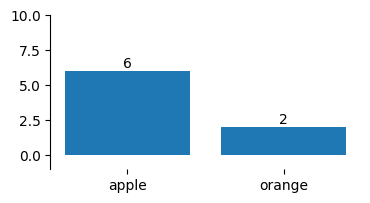

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
plt.ylim(-1, 10)
bar = plt.bar(x=values.value_counts().index, height=values.value_counts().values)

plt.bar_label(bar)

# Hide outer box (spines)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)

plt.show()

**Under the hood:** Categoricals are stored as integers referencing a dictionary of values.

In [15]:
values = pd.Series([0, 1, 0, 0] * 2)

dim = pd.Series(["apple", "orange"])

values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [16]:
dim

0     apple
1    orange
dtype: str

In [17]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: str

**Using Pandas `category` type:**

In [18]:
fruits = ["apple", "orange", "apple", "apple"] * 2
N = len(fruits)

# to ensure reproducibility
rng = np.random.default_rng(seed=12345)

df = pd.DataFrame({"fruit": fruits, 
                   "basket_id": np.arange(N), 
                   "count": rng.integers(3, 15, size=N), 
                   "weight": rng.uniform(0, 4, size=N)}, 
                  columns=["basket_id", "fruit", "count", "weight"])

df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [19]:
# Convert object column to category
fruit_cat = df['fruit'].astype('category')

fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, str): ['apple', 'orange']

The values for `fruit_cat` are now an instance of `pandas.Categorical`, which you can access via the `.array` attribute:

In [20]:
c = fruit_cat.array

type(c)

pandas.Categorical

In [21]:
c.categories

Index(['apple', 'orange'], dtype='str')

In [22]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [ ]:
dict(enumerate(c.categories))

In [23]:
# Assign back to the dataframe
df['fruit'] = df['fruit'].astype('category')

df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


**Creating from Codes:**

In [ ]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]

my_cats = pd.Categorical.from_codes(codes, categories)

my_cats

**Ordered Categoricals:** Useful for Likert scales or sizes (Small < Medium < Large).

In [ ]:
ordered_cats = pd.Categorical.from_codes(codes, categories, ordered=True)

ordered_cats

**Binning Data (`pd.cut`):** Converting continuous data (e.g., Age) into categorical bins (e.g., Age Groups).

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
# Define bin edges
bins = [18, 25, 35, 60, 100]

# Cut the data
age_cat = pd.cut(ages, bins)

age_cat

In [ ]:
age_cat.codes

In [ ]:
age_cat.categories

In [ ]:
age_cat.categories[0]

In [ ]:
pd.value_counts(age_cat)

**Binning Parameters:**

In [ ]:
# right=False makes the left side closed [inclusive, exclusive)
pd.cut(ages, bins, right=False)

In [ ]:
# Adding custom labels
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]

pd.cut(ages, bins, labels=group_names)

If you pass an integer number of bins to `pd.cut`, it will compute equal-length bins based on the min/max of the data.

In [ ]:
data = np.random.uniform(size=20)

pd.cut(data, 4, precision=2)

> **Task:** Cut `ages` into 5 bins instead of 4. Set the labels to `['Youth', 'YoungAdult', 'MiddleAged', 'Senior', 'Elderly']`.

**Categorical Methods (.cat):**

In [ ]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')

cat_s

In [ ]:
cat_s.cat.codes

In [ ]:
cat_s.cat.categories

Modifying categories:

In [ ]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)

cat_s2

In [ ]:
cat_s.value_counts()

In [ ]:
cat_s2.value_counts()

In [ ]:
cat_s2.cat.remove_unused_categories()

**Computing Indicator / Dummy Variables:** Converting categorical variables into binary columns (One-Hot Encoding) for machine learning.

In [ ]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"], 
                   "data1": range(6)})

df

In [ ]:
pd.get_dummies(df["key"])

In [ ]:
dummies = pd.get_dummies(df["key"], prefix="key")

dummies

Recipe: Combining `get_dummies` with `cut`.

In [ ]:
np.random.seed(12345)

values = np.random.uniform(size=10)

values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

pd.get_dummies(pd.cut(values, bins))

> **Task:** Cut values into 4 bins and create dummy variables.

### Databases

Connecting to a database using `sqlalchemy`.

In [ ]:
import sqlalchemy as sqla

In [ ]:
import os 

parent_dir = os.path.abspath(os.path.pardir)

In [ ]:
# Create connection string
engine = sqla.create_engine(f'duckdb:///{parent_dir}/data/unit-1-4.db')

In [ ]:
# Read entire table
df = pd.read_sql('resale_flat_prices_2017', engine)

In [ ]:
df

In [ ]:
# Execute raw SQL query
df = pd.read_sql("SELECT * FROM resale_flat_prices_2017", engine)

In [ ]:
engine.table_names()

### Binary files (Pickle)

`pickle` is Python's native serialization format. Good for short-term storage, but not for sharing data between different languages.

In [ ]:
result.to_pickle('../data/out.pkl')

In [ ]:
data = pd.read_pickle('../data/out.pkl')

data

> **Task:** Write a filtered DataFrame to a new database table.
> 1. Filter for flats in "YISHUN".
> 2. Write to table `yishun_flat_prices_2017`.

In [ ]:
df_yishun = df[df.town == "YISHUN"]

df_yishun.to_sql("yishun_flat_prices_2017", engine)

> **Final Challenge:** 
> 1. Read only flats from `BISHAN` to a new dataframe.
> 2. Write the dataframe to a new database table `bishan_flat_prices_2017`.